<ipython-input-33-6be201721685>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.dropna(inplace=True)
[I 2024-09-15 00:43:45,912] A new study created in memory with name: no-name-e1b02afd-6ca9-448e-9d71-8e808461b447
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-09-15 00:43:54,971] Trial 0 finished with value: 21.93014144897461 and parameters: {'num_unidades': 16}. Best is trial 0 with value: 21.93014144897461.
[I 2024-09-15 00:44:00,331] Trial 1 finished with value: 20.4274845123291 and parameters: {'num_uni

Mejores Hiperparámetros:
Número de Capas: 1
Número de Unidades: 64
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 629.9698 - mae: 23.9944 - val_loss: 588.8467 - val_mae: 22.9064
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 627.0723 - mae: 23.9342 - val_loss: 586.0829 - val_mae: 22.8439
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 624.1583 - mae: 23.8735 - val_loss: 583.2867 - val_mae: 22.7806
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 621.2073 - mae: 23.8120 - val_loss: 580.4520 - val_mae: 22.7162
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 618.2095 - mae: 23.7494 - val_loss: 577.5688 - val_mae: 22.6506
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 615.1569 - mae: 23.6855 - val_loss: 574.6271 - val_mae: 22.5834
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 612.0364 - mae: 23.6200 - val_loss: 571.6180 - val_mae: 22.5145
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 608.8347 - mae: 23.5526 - val

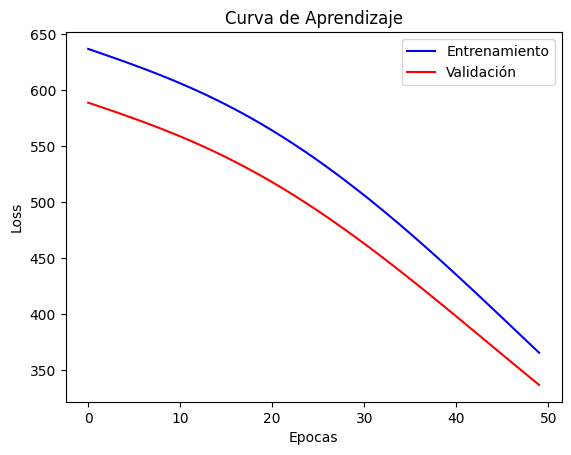

Trial 1:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 2:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 3:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 4:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 5:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 6:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 7:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 8:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 9:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}
Trial 10:
  Value: 20.4274845123291
  Params: {'num_unidades': 64}


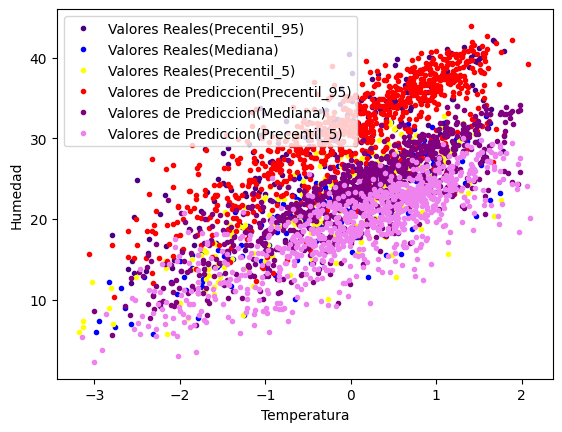

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
SEED=1234
# Cargar el conjunto de datos
datos = pd.read_csv("/content/drive/MyDrive/AI/Datasets/1er_Parcial/Temp_Asu20092021.csv")

# Convertir la columna 'Fecha' al tipo datetime y establecerla como índice
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
datos.set_index('Fecha', inplace=True)

# Filtrar datos a partir de 2019
datos = datos[datos.index.year >= 2019]

# Eliminar filas con valores faltantes
datos.dropna(inplace=True)

# Calcular los percentiles 95, 50 (mediana) y 5 para cada día
percentiles_diarios = datos.resample('D')['Temperatura'].agg([lambda x: np.percentile(x, 95),
                                                              lambda x: np.percentile(x, 50),
                                                              lambda x: np.percentile(x, 5)])
percentiles_diarios.columns = ['Percentil_95', 'Mediana', 'Percentil_5']

# Desplazar para obtener los percentiles del siguiente día como variables objetivo
percentiles_diarios['Percentil_95_siguiente_dia'] = percentiles_diarios['Percentil_95'].shift(-1)
percentiles_diarios['Mediana_siguiente_dia'] = percentiles_diarios['Mediana'].shift(-1)
percentiles_diarios['Percentil_5_siguiente_dia'] = percentiles_diarios['Percentil_5'].shift(-1)

# Eliminar filas con valores faltantes
percentiles_diarios.dropna(inplace=True)

# Seleccionar características (por ejemplo,buscar variables adicionales)
X=percentiles_diarios[['Percentil_95','Mediana','Percentil_5']].values
y = percentiles_diarios[['Percentil_95_siguiente_dia','Mediana_siguiente_dia','Percentil_5_siguiente_dia']].values

# Escalar las características
scaler_X = StandardScaler()
X_escalado = scaler_X.fit_transform(X)

# Dividir datos en conjuntos de entrenamiento y validación
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(X_escalado, y, test_size=0.2, random_state=SEED, shuffle=False)


# Definir función objetivo para Optuna
def objetivo(trial):
    num_capas = 1
    tf.keras.utils.set_random_seed(SEED)

    num_capas = 1
    num_unidades = trial.suggest_categorical('num_unidades', [16, 32, 64])


    # Definir la arquitectura del modelo
    modelo = Sequential()
    modelo.add(Dense(num_unidades, activation='relu', input_shape=(X_entrenamiento.shape[1],)))
    for _ in range(num_capas - 1):
        modelo.add(Dense(num_unidades, activation='relu'))

    # Capa de salida para predecir los 3 percentiles (95, 50, 5)
    modelo.add(Dense(3, activation='linear'))

    # Compilar el modelo
    modelo.compile(optimizer=Adam(),
                   loss='mse',  # Para regresión, se usa 'mean squared error'
                   metrics=['mae'])  # Mean Absolute Error (MAE) para evaluación

    # Entrenar el modelo
    modelo.fit(X_entrenamiento, y_entrenamiento, validation_data=(X_validacion, y_validacion), epochs=30, batch_size=256, verbose=0, shuffle=False)

    # Evaluar el modelo en el conjunto de validación
    _, val_mae = modelo.evaluate(X_validacion, y_validacion, verbose=0)

    return val_mae

# Realizar la optimización de hiperparámetros usando Optuna
estudio = optuna.create_study(direction='minimize')  # Minimizamos el MAE en lugar de maximizar
estudio.optimize(objetivo, n_trials=100)

# Obtener los mejores hiperparámetros
mejor_num_capas =  1
mejor_num_unidades = estudio.best_params['num_unidades']

print("Mejores Hiperparámetros:")
print("Número de Capas:", 1)
print("Número de Unidades:", mejor_num_unidades)



# Entrenar el modelo final usando los mejores hiperparámetros
modelo_final = Sequential()
modelo_final.add(Dense(mejor_num_unidades, activation='relu', input_shape=(X_entrenamiento.shape[1],)))
for _ in range(mejor_num_capas - 1):
    modelo_final.add(Dense(mejor_num_unidades, activation='relu'))
modelo_final.add(Dense(3, activation='linear'))

modelo_final.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss='mse',
                     metrics=['mae'])

# Entrenar el modelo final
history = modelo_final.fit(X_entrenamiento, y_entrenamiento, validation_data=(X_validacion, y_validacion), epochs=50, batch_size=256, verbose=1, shuffle=False)

# Evaluar en conjunto de prueba
mae = modelo_final.evaluate(X_validacion, y_validacion, verbose=0)
print(f'MAE en validación: {mae}')

#Curva de Aprendizaje del modelo final
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Entrenamiento")
    plt.plot(epochs, val_loss, "r", label="Validación")
    plt.title(title)
    plt.xlabel("Epocas")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Curva de Aprendizaje")

# Obtener los 10 mejores ensayos de los hiperparametros
top_trials = estudio.best_trials[:10]

# Mostrar cada ensayo con su valor y parametros correspondientes
for i, trial in enumerate(top_trials):
    print(f"Trial {i+1}:")
    print(f"  Value: {trial.value}")
    print(f"  Params: {trial.params}")

#Grafico de Dispersión con valores del conjunto de test
X_real= X_validacion
Y_real = y_validacion

X_prediccion= X_entrenamiento
Y_prediccion = y_entrenamiento

plt.figure()

plt.xlabel("Temperatura")
plt.ylabel("Humedad")
plt.plot(X_real[:,0] , Y_real[:,0], '.'  , color="indigo" ,label = "Valores Reales(Precentil_95)" )
plt.plot(X_real[:,1] , Y_real[:,1], '.'  , color="blue" ,label = "Valores Reales(Mediana)" )
plt.plot(X_real[:,2] , Y_real[:,1], '.'  , color="yellow" ,label = "Valores Reales(Precentil_5)" )
plt.plot(X_prediccion[:,0] , Y_prediccion[:,0], '.'  , color="red" ,label = "Valores de Prediccion(Precentil_95)" )
plt.plot(X_prediccion[:,1] , Y_prediccion[:,1], '.'  , color="purple" ,label = "Valores de Prediccion(Mediana)" )
plt.plot(X_prediccion[:,2] , Y_prediccion[:,2], '.'  , color="violet" ,label = "Valores de Prediccion(Precentil_5)" )
plt.legend()
plt.show()
